# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 23 (Friday) 11:00 pm </b> </font>

<font color="blue"> Sapna Pareek </font>

# I. Introduction(Overview)

The objective of this assignment is to understand the different algorithms for classification problems. In machine learning, classification is a part of supervised learning where new observation belongs in a set of categories, based on training set of data containing observations whose category is known.

The purpose of this assignment is to compare the different classification algorithms that is best suited to solve the classification problems. The focus is on generalization performance and prediction accuracy. We will learn about four different algorithms to solve the classification problems as stated below: -

1. Pocket Algorithm
2. Quadratic Discriminant Analysis (QDA)
3. Linear Discriminant Analysis (LDA)
4. Logistic Regression

Using the above mentioned algorithms, we will determine the efficiency of these algorithms and can compare these algorithms with each other for their performances. While learning these algorithms we will understand the classification measures like Accuracy, confusion matrix, Precision, Recall and F1 score to measure the accuracy and precision of the classification model.

# II. Data

### II.1 Description

Data set for Classification used is related to the US census bureau. This data set is available on Kaggle and UCI and data set can be used for understanding the behaviour of the classification algorithms. Here we have different attributes on the data that help us determine that based on the available information to which income group that individual belongs to that is  either >50K or <=50K.
          
**Dataset name**: adult.csv

**Number of features**: 12

**Number of Instances**: 48842
         
**Information about features**: -

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- gender: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- income(target): >50K, <=50K


## Source


https://www.kaggle.com/wenruliu/adult-income-dataset

http://www.cs.toronto.edu/~delve/data/adult/desc.html

a) Original owners of database (name/phone/snail address/email address)
US Census Bureau.

(b) Donor of database (name/phone/snail address/email address)
Ronny Kohavi and Barry Becker,
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com

(c) Date received (databases may change over time without name change!)
05/19/96

**Reading the data**

In [29]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df_Class = pd.read_csv("adult.csv")

**Prepocessing of the data**

In [31]:
df_Class.head() #Returns the top 5 results

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [32]:
df_Class.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
df_Class.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [34]:
cols = ['workclass','education','marital-status','occupation','relationship','race','native-country','gender','income']
df_Class[cols] = df_Class[cols].apply(lambda x: pd.factorize(x)[0] + 1)

df_Class.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1,226802,1,7,1,1,1,1,1,0,0,40,1,1
1,38,1,89814,2,9,2,2,2,2,1,0,0,50,1,1
2,28,2,336951,3,12,2,3,2,2,1,0,0,40,1,2
3,44,1,160323,4,10,2,1,2,1,1,7688,0,40,1,2
4,18,3,103497,4,10,1,4,1,2,2,0,0,30,1,1


In [35]:
df_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [36]:
df_Class.shape

(48842, 15)

In [37]:
df_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


## II.2. Visualization of the data

Data visualization is a method to extract the information about the data using the graphical representation of data. Here for visualizing the Regression data set we will use matplotlib and seaborn libraries. Using the mentioned libraries, we will plot below mentioned graphs: -

**Pair plot**: Plots pairwise relationship of the data. A grid of axis is created such that each feature on the y axis is shared as a single row on the x axis across a single column. The diagonal axis shows the univariate distribution for variable in that column.

**Heatmap**: Heatmap is representation of data in form of diagram where data values are represented as colours.

**plots for understanding or analysis**

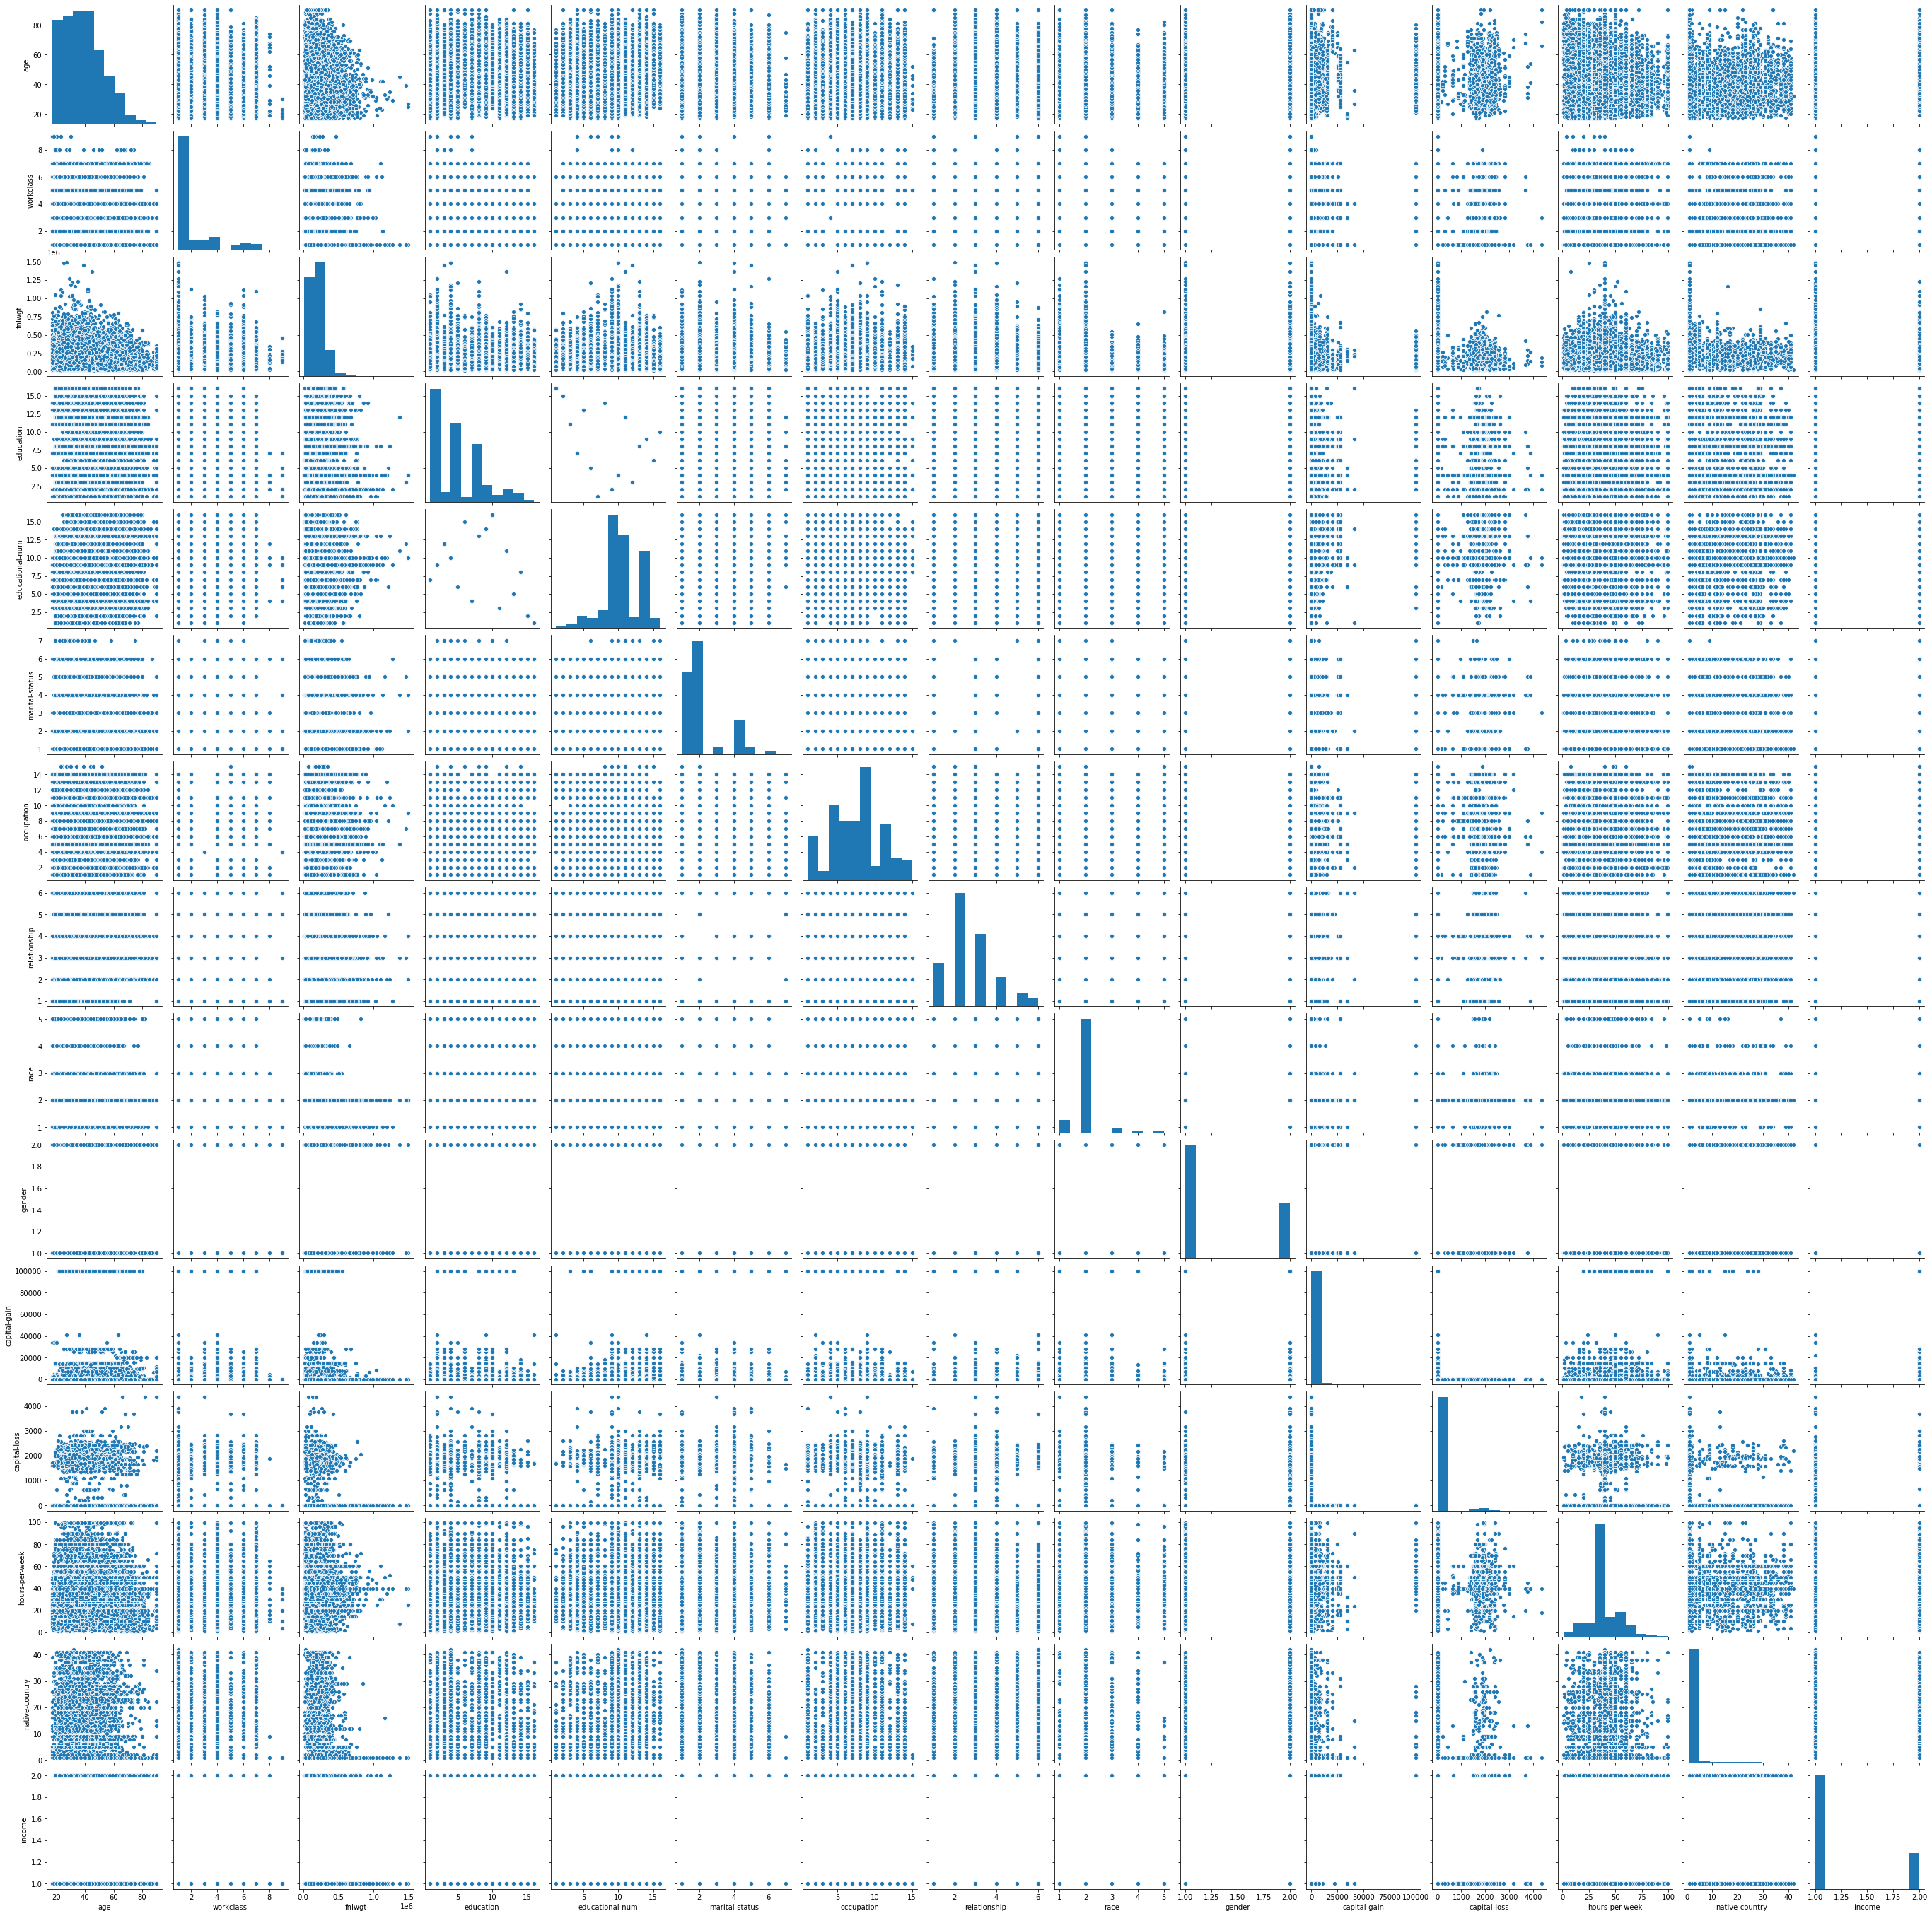

In [38]:
sns.pairplot(df_Class)

C:\Users\paree\Anaconda3\envs\py38\lib\site-packages\seaborn\matrix.py:301: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  mesh = ax.pcolormesh(self.plot_data, vmin=self.vmin, vmax=self.vmax,


<AxesSubplot:>

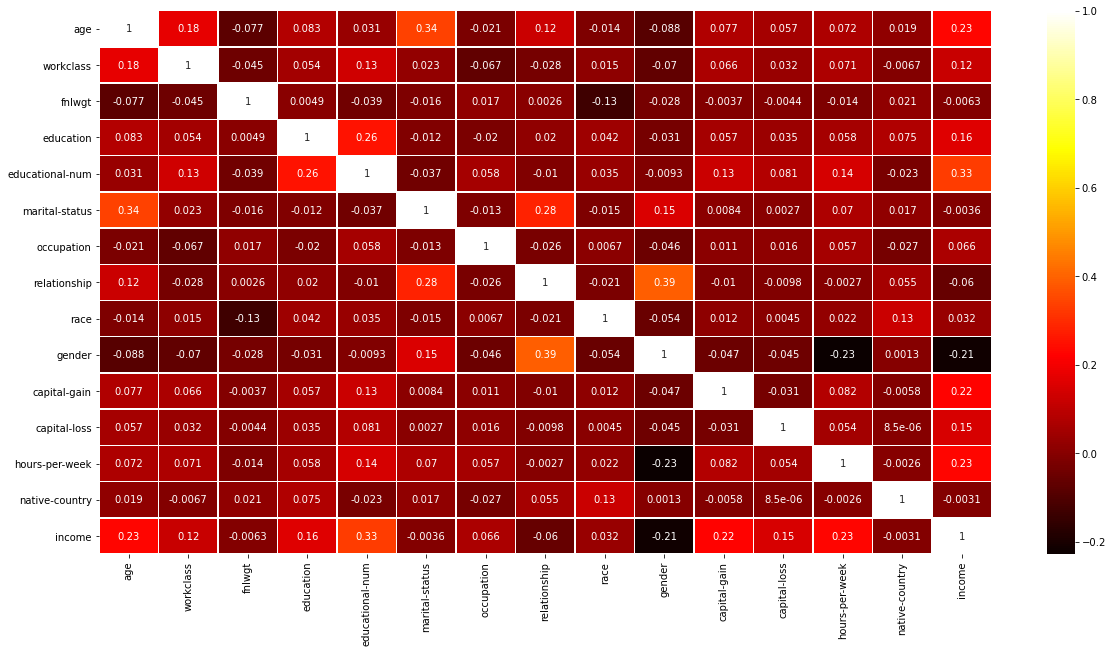

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Class.corr(),annot=True, lineWidth = 0.5, cmap='hot')

### II.3. Preliminary Observation

**Pairplot**: Relationship between the single variable and two variables can be derived using pairplot. From the pair plot graph we can observe that each variable is mapped to each other.

**Heatmap**: From intensity of the colors we can get the information about the correaltion of each features. 1 means the maximum corelation. Diagonal value is mapped to itself so it has the maximum corealtion that is 1. From the graph we can observe that maximun corelation is between the age and hours-per-week which is 0.23. Minum correlation between income and native-country is -0.0031.

# III. Method

Summary of the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 

Below is the Review and implementation of the models: -

 - review of the 4 classification models 
 - Code implementation and description


## III.1. Summary of Classification Models

### Pocket Algorithm

Pocket algorithm is based on perceptron algorithm. It helps to find the solution for the limitations of the perceptron algorithm. If the learning set is not linearly separable the perceptron learning algorithm does not terminate. However, a quite simple variant of perceptron algorithm is proposed that can compute a good approximation to this ideal linear separation. The main idea for the pocket algorithm is to store the best weight vector found so far by the perceptron algorithm in a pocket. If best weight is found, it supersedes the one currently stored weight and continues to run the algorithm. Mathematical representation of the pocket algorithm is stated below: - 

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

**α** is the learning rate

Based on the above equation, the pocket algorithm stores the best value after iterating through each step and keeping in pocket the best solution.

### Quadratic Discriminant Analysis (QDA)

When we have an input as non-linear combination of predictor variables X than, we apply QDA for modelling and classifying the categorical responses Y. QDA assumes that the observations are drawn from a Gaussian distribution from each class of Y and each class has its own covariance matrix.

In this case we define the decision boundary and calculate the posterior and prior probabilities. The probability that one instance belongs to a gaussian distribution class is calculated by considering the covariance, mean and prior probability for the target.

the discriminant function $\delta_k(xv)$ can be defined as

$$
\delta_k(xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

For a new sample $\tilde{xv}$, the label can be predicted with

$$
y = \arg\max_k \delta_k(\tilde{xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$.

It is called Quadratic Discriminant Analysis (QDA) as its decision boundary is quadratic and here we consider two covariance matrix to get our desired value.

### Linear Discriminant Analysis (LDA)

Linear discriminant analysis is used to find discriminant scores for each observation to classify what response variable class it falls under that is default or not default. These scores are computed by identifying the linear combinations of independent variables. 

Assumption for the LDA are as follows: -

a. LDA assumes that attributes in the entire data set has the same variance.

b. LDA assumes data as gaussian so it sees graph as a bell curve graph with normal distribution.

LDA predicts by calculating the probability that a new set of inputs belongs to each class. The output class is the one that has the highest probability. Mathematical representation of the LDA as follows: -

$$
 \delta_k(xv) = xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
 $$
 
 here, $\boldsymbol\delta_k(xv)$ is the estimated discrimannt score
 
 $\boldsymbol\mu_k$ is the average of all the training observation from the kth class
 
### Logistic Regression

Logistic Regression is a type of supervised classification machine learning algorithm. It predicts the categorical (binomial or multinomial values of y) outcome. LR predictions are in form of probabilities of an event occurring, example probability of y=1, given certain values of input variables x. Logistics regression is a simple and efficient algorithm and it has low variance. 
The model uses probability to calculate what instance belongs to what class.

Assumptions for the Logistics Regression are as follows: -

a. binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

b. LR must be observations to be independent of each other.

c. LR requires there to be little or no multicollinearity among the independent variables.

Mathematical representation of the logistics regression: - 

$$
 wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n
$$

we can get matrix calculation as follows: -

$$
 wv_j \leftarrow wv_j + \alpha Xm^\top \Big(  t_{*,j} - g_j(Xm)\Big)
$$


## III.2. Explaination of codes

### A. Super Class Definition

BaseModel is a super class which inherits from the ABC class. 'abc' is a module in a python library provides the infrastructure for defining the custom abstract classes. Super class BaseModel defines two abstract method **train** method and **use** method. Which can be implemented in the classes that uses these methods.

Abstract class **Classifier** is implemented and inherits from the BaseModel class. Three methods are implemented in the classifier class are normalize, _check_matrix and add_ones.

**normalize** method standardised the input by calculating the mean and standard deviation. 

**_check_matrix** method is used to check if matrix is 2D and if not, it raises the value error. 

**add_ones**is a method that checks if it is a matrix or not, if it is a matrix it adds 1s column at the beginning.

Inherited abstract methods **train** and **use** are implemented in the cases that uses these methods and inherits from the superclass.

In [40]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX        
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

Below is the implementation of the pocket algorithm. Pocket algorithm is a better version of the perceptron algorithm. When training the perceptron data becomes linearly separable, thus convergence is 0. But when we deal with real world data this might not be the case, and weight training the perceptron might end up long time. This is when we use perceptron algorithm which keeps the best solution obtained so far.

Below we have implemented the compare method which compares the four parameters like data, weight, best weight, and labels to get the best output. For loop is used to train the algorithm, we have variables like alpha which is the learning rate and number of iterations are initialized. Two weights are calculated and trained which provides the best solution obtained so far. Hence pocket algorithm keeps track of all the outputs and considers the best solution so far.

End of training:  9999


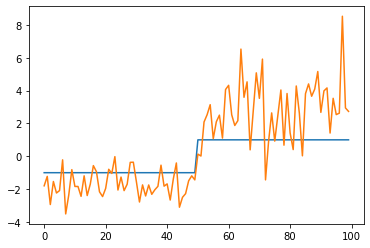

In [41]:
maxiter = 10000
alpha = 0.1

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

C1 = np.random.multivariate_normal(mu1, cov1, 50)
C2 = np.random.multivariate_normal(mu2, cov2, 50)

X = np.vstack((C1, C2))
N = X.shape[0]
T = np.ones(N)
T[:50] *= -1 
X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))

from copy import deepcopy as copy 


maxiter = 10000
alpha = 0.2


# return 1 if w is better -1 if wp is better
def compare(X, T, w, wp):
    y = np.sign(X @ w)
    yp = np.sign(X @ wp)

    return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    

w = np.zeros(3)
w_pocket = copy(w)

plt.plot(T)
for i in range(maxiter):
    
    converged = True
    for k in np.random.permutation(N): #range(N):
        y = w @ X1[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X1[k]
            converged = False
            ##### additional for pocket algorithm 
            if compare(X1, T, w, w_pocket) > 0: 
                w_pocket[:] = w[:]
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
plt.plot(X1@w_pocket)

### C. QDA

Below is the Implementation of the Quadratic discriminant analysis. Here we have implemented the QDA method. Below code will calculate the mean and covariance for the statistical analysis of the data. Variables d1 and d2 is calculates the discriminant function on the test data.

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

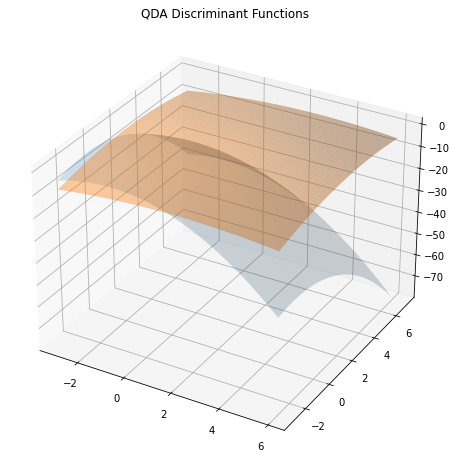

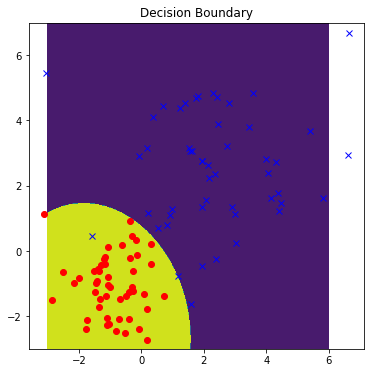

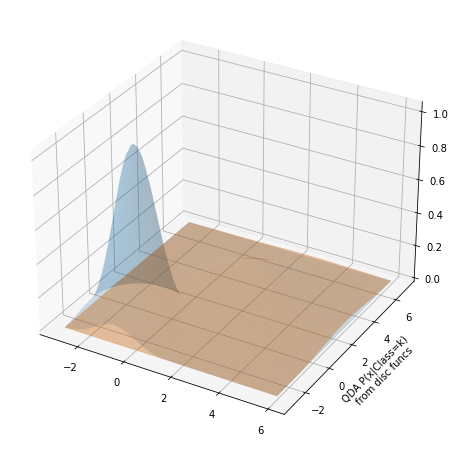

In [42]:
from mpl_toolkits.mplot3d import Axes3D

N1 = C1.shape[0]
N2 = C2.shape[0]
N = N1 + N2

Xtrain = np.vstack((C1, C2))
Ttrain = np.ones(80)
Ttrain[:N1] *= -1

def QDA(X, mu, sigma, prior):
    sigma_inv = np.linalg.inv(sigma)
    diffv = X - mu
    return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
#np.sum(np.dot(diffv, sigma_inv) * diffv, axis=1) \

# QDA train

## compute the mean and covariance

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xs = (Xtrain - means) / stds

mu1 = np.mean(Xs[:N1], 0)
mu2 = np.mean(Xs[N1:], 0)

Sigma1 = np.cov(Xs[:N1].T)
Sigma2 = np.cov(Xs[N1:].T)


prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest-means)/stds

d1 = QDA(XtestS, mu1, Sigma1, prior1)
d2 = QDA(XtestS, mu2, Sigma2, prior2)


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### D. LDA

Below is the Implementation of the Linear discriminant analysis. Here we have implemented the LDA method. Below code will calculate the mean and covariance for the statistical analysis of the data. Variables d1 and d2 is calculates the discriminant function on the test data.

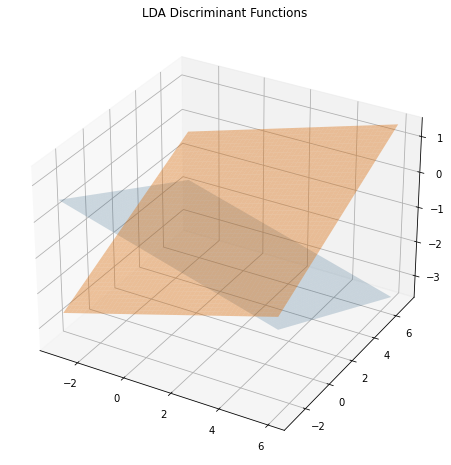

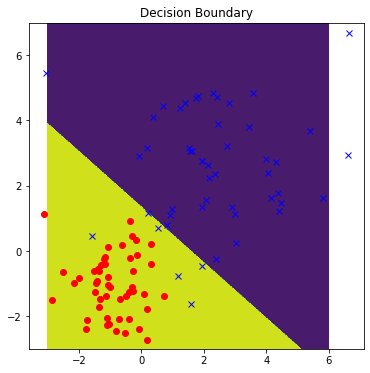

In [43]:
def LDA(X, mu, sigma, prior):
    sigma_inv = np.linalg.inv(sigma)
    return np.sum((X @ sigma_inv) * mu \
                - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                + np.log(prior)

# LDA train

## compute the mean and covariance

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
Xs = (Xtrain - means) / stds

mu1 = np.mean(Xs[:N1], 0)
mu2 = np.mean(Xs[N1:], 0)

Sigma = np.cov(Xs.T)

prior1 = N1 / N
prior2 = N2 / N

## now compute the discriminant function on test data

xs, ys = np.meshgrid(np.linspace(-3,6, 500), np.linspace(-3,7, 500))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = (Xtest-means)/stds

d1 = LDA(XtestS, mu1, Sigma, prior1)
d2 = LDA(XtestS, mu2, Sigma, prior2)


fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (d1-d2 > 0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

array([[9.99951216e-01, 4.87842261e-05],
       [9.93227380e-01, 6.77261961e-03],
       [9.97042251e-01, 2.95774934e-03],
       [9.88959136e-01, 1.10408637e-02],
       [9.96930980e-01, 3.06902006e-03],
       [9.96474586e-01, 3.52541414e-03],
       [9.99796405e-01, 2.03595239e-04],
       [8.05563979e-01, 1.94436021e-01],
       [9.99569350e-01, 4.30649810e-04],
       [9.91822551e-01, 8.17744922e-03],
       [9.94265482e-01, 5.73451815e-03],
       [8.08780708e-01, 1.91219292e-01],
       [9.40822067e-01, 5.91779331e-02],
       [9.84278627e-01, 1.57213726e-02],
       [9.95083122e-01, 4.91687817e-03],
       [9.99833352e-01, 1.66647567e-04],
       [9.62225152e-01, 3.77748484e-02],
       [9.46285749e-01, 5.37142514e-02],
       [8.42091718e-01, 1.57908282e-01],
       [9.79567580e-01, 2.04324195e-02],
       [3.87440990e-03, 9.96125590e-01],
       [4.60766026e-01, 5.39233974e-01],
       [2.96710360e-02, 9.70328964e-01],
       [2.07918656e-02, 9.79208134e-01],
       [6.797787

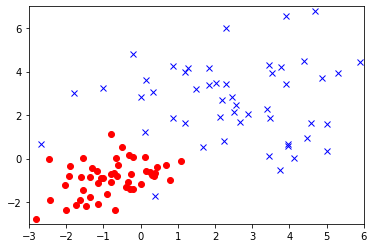

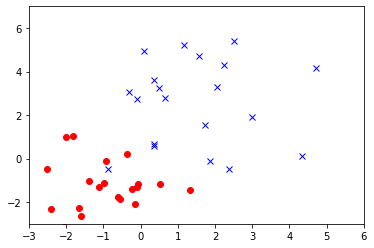

<Figure size 1152x576 with 0 Axes>

In [44]:
def softmax(z):
    if not isinstance(z, np.ndarray):
        z = np.asarray(z)
    f = np.exp(z) 
    return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

def g(X, w):
    return softmax(X @ w) 


N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3


C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 2))
Ttrain[:50, 0] = 1
Ttrain[50:, 1] = 1

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)

Xtrains = (Xtrain - means) / stds


Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 2))
Ttest[:20, 0] = 1
Ttest[20:, 1] = 1


Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])

w = np.random.rand(D+1, K)

import IPython.display as ipd  # for display and clear_output
fig = plt.figure(figsize=(16, 8))

niter = 1000
alpha = 0.1

X1 = np.hstack((np.ones((N, 1)), Xtrain))
likeli = []
for step in range(niter):
    ys = g(X1, w)
    w += alpha * X1.T @ (Ttrain - ys)
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)    
    
X1t = np.hstack((np.ones((Xtest.shape[0],1)), Xtest))
Y = g(X1t, w)

Y


Accuracy:  97.5 %


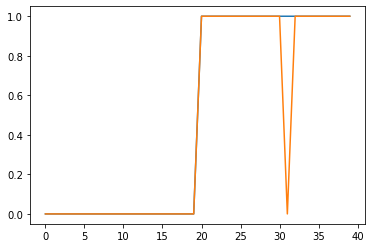

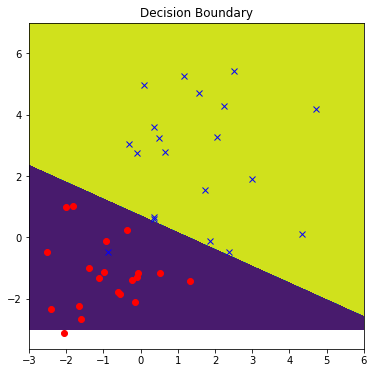

In [45]:
Yl = np.argmax(Y, 1)
Tl = np.argmax(Ttest, 1)

plt.plot(Tl)
plt.plot(Yl)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")
x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
X1 = np.hstack((np.ones((X.shape[0], 1)), X))

Y = g(X1, w)
zs = np.argmax(Y, 1)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')


### E. Logistic Regression

Below is the implementation of the Logistic Regression class, which inherits from the Classifier class. Logistic class implements the train and use function inherited from the Classifier class. It initializes the classifier class in the __init__ function. Sigmoidfun and g methods are implemented in the Logistic class. Logistic regression uses the probability to determine the value of each class input belongs to which class.

In [46]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

# IV. Experiments

Below Sections we have applied all the classification algorithms on the adult.csv data set. And will discuss the results and plots for the data.

Below is the list for consideration:
- the classification results
- plots of classification results 
- model comparison 
- we are using precision, recall and f1 score for evaluation metrics

# IV.A Pocket Algorithm

Code explanation:

Here we have initialised the two multivariate distribution and stacked them to form input X. We have implemented the methods compare. And inherited method from the Classifier class that is train and use. Below code loop through the iterations and create w_pocket to store the best solution so far and keep updating with the best result by comparing the w_pocket[:] = w[:].

In [47]:
class PocketAlgorithm(Classifier): 

    def __init__(self):
        Classifier.__init__(self)
    
    
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T): 
        
        X = self.normalize(X)
        
        maxiter = 1
        alpha = 0.1
        
        X1 = self.add_ones(X)
        print(X1.shape)
        N = X.shape[0]
        w = np.zeros(X1.shape[1])
        self.w_pocket = copy(w)
        
        plt.plot(T)
        
        for i in range(maxiter):
            converged = True
            for k in range(N):
                y = w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    w += alpha * T[k] * X1[k]
                    converged = False
                    if self.compare(X1, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]

            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)
        plt.plot(X1@self.w_pocket)
        
    def use(self, X): 
        X = self.normalize(X)
        return self.add_ones(X) @ self.w_pocket

Training the data set and Testing the data set

(15000, 15)
End of training:  0


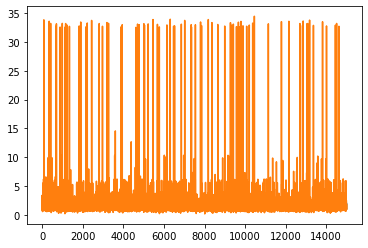

In [48]:
X = df_Class.loc[:,df_Class.columns!='income'] 
T = df_Class['income'] 
pocket = PocketAlgorithm() 
(X[:15000],T[:15000])
pocket.train(X[:15000],T[:15000])

In [49]:
X[:5000].shape

(5000, 14)

In [50]:
pocket.use(X[:5000])

array([1.19381771, 1.1578293 , 0.97607412, ..., 1.54815109, 0.86709999,
       0.72743194])

Plots for result

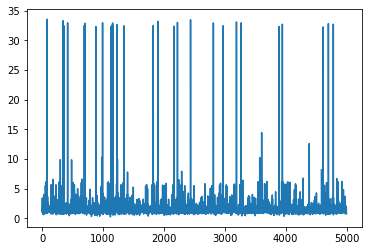

In [51]:
plt.plot(pocket.use(X[:5000]))

Evaluation metrics

In [53]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,precision_score,recall_score,precision_recall_fscore_support
y_actual = T.values[:5000]
y_pred = pocket.use(X[:5000])
f1_score(y_actual,y_pred.round(),average='weighted')

0.556042581946452

In [54]:
accuracy_score(y_actual,y_pred.round())

0.5126

In [55]:
precision_score(y_actual,y_pred.round(),average='weighted')

0.6120385876624851

#### Below is the Discussion on the Pocket algorithm implementation: -

1.	**Evaluation metrics**: We have calculated the F1 score that is 0.55, accuracy of the pocket algorithm is 0.51 and precision is 0.612

2.	**Train and test accuracies**: Comparing the train and test accuracies we get results like it took longer time and did not perform well.

3.	**Plots for Pocket algorithm** - From above graphs we can see we have plotted two graphs to see how the training and testing data is distributed and compared the results obtained.

# IV.B QDA

Below is the implementation of the QDA class that inherits from the Classifier class. It initialises the class in init method. Method train and use are implemented here. Here probability of class is calculated and stored in the p1 and p2 variable.

In [56]:
from copy import deepcopy as copy
class QDA(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.Sigma2=None
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
       
        
        
    @staticmethod    
    def QDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        sub = np.asarray(X - mu)
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(sub @ sigma_inv * sub, axis=1) + np.log(p)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['status']=t
        X1=new_df[new_df.status == 1]
        X1=X1.drop(['status'],axis=1)
        X2=new_df[new_df.status == 2]
        X2=X2.drop(['status'],axis=1)
        
        self.mu1 = np.mean(X1, 0)
        self.mu2 = np.mean(X2, 0)
        self.Sigma1 = np.cov(X1.T)
        self.Sigma2 = np.cov(X2.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.QDAfunc(Xtest,np.matrix(self.mu1),self.Sigma1,self.p1),self.QDAfunc(Xtest,np.matrix(self.mu2),self.Sigma2,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,2)
        
        return pred,self.d1,self.d2
    

In [57]:
T.value_counts()

1    37155
2    11687
Name: income, dtype: int64

In [58]:
qdalgo = QDA()
qdalgo.train(X, T)

In [59]:
qdalgo.use(X)

(array([1, 1, 1, ..., 1, 1, 2]),
 array([  -3.60155413,   -0.90498239,   -1.1390072 , ...,   -0.7783319 ,
          -0.70566863, -133.80063621]),
 array([-13.72213781,  -4.25748567,  -4.95141827, ...,  -5.58192169,
         -9.66145236,  -8.96130951]))

Plots for results

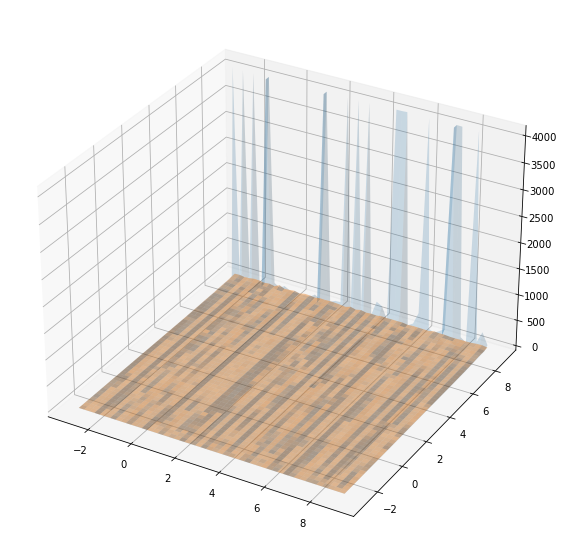

In [60]:
from mpl_toolkits.mplot3d import Axes3D
pred,d1_pred,d2_pred = qdalgo.use(X[:2500])    


xs, ys = np.meshgrid(np.linspace(-3,9, 50), np.linspace(-3,9, 50))
fig = plt.figure(figsize=(10,10))
axs = fig.gca(projection='3d')
axs.plot_surface(xs, ys, np.sort(-1 *d1_pred.reshape(xs.shape),0), alpha=0.2)
axs.plot_surface(xs, ys, np.sort(-1 *d2_pred.reshape(xs.shape),0), alpha=0.4)

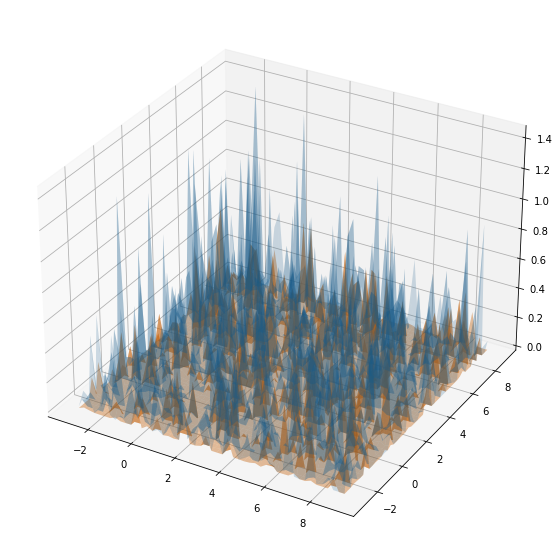

In [62]:
fig = plt.figure(figsize=(10,10))
axs = fig.gca(projection='3d')
prob1 = np.exp( d1_pred.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(qdalgo.p1))
prob2 = np.exp( d2_pred.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(qdalgo.p2))
axs.plot_surface(xs, ys, prob1, alpha=0.2)
axs.plot_surface(xs, ys, prob2, alpha=0.4)

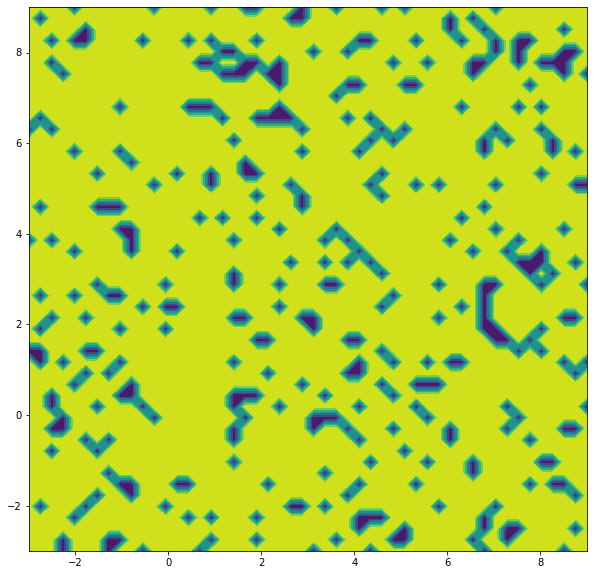

In [63]:
plt.figure(figsize=(10,10))
plt.contourf(xs, ys, (((d1_pred-d2_pred)) > 0).reshape(xs.shape))

In [65]:
y_actual = T[:5000].values # Partition test dataset
y_pred_qda = qdalgo.use(X[:5000]) 
f1_score(y_actual,y_pred_qda[0].round(),average='weighted')

0.8010850648655151

Evaluation metrics

In [66]:
prec_qda,recall_qda,f1_score_qda,_ = precision_recall_fscore_support(y_actual,y_pred_qda[0].round(),average='weighted')
print("Precision: "+str(prec_qda)+
     "\nRecall: "+str(recall_qda)+
     "\nF1 Score: "+str(f1_score_qda))

Precision: 0.8049470377931023
Recall: 0.819
F1 Score: 0.8010850648655151


#### Below is the Discussion on the QDA algorithm implementation: -

1.	**Evaluation metrics**: We have calculated the F1 score that is 0.819, accuracy of the QDA algorithm is 0.81 and precision is 0.81

2.	**Train and test accuracies**: Comparing the train and test accuracies we get results better results and QDA performed better on the test data.

3.	**Plots for QDA algorithm**: - From above graphs we can see we have plotted three graphs to see how the training and testing data is distributed and compared the results obtained.

# IV.C LDA

Below is the implementation of the LDA class that inherits from the Classifier class. It initialises the class in init method. Method train and use are implemented here. Here probability of class is calculated and stored in the p1 and p2 variable.

In [67]:
class LDA(Classifier): 
    
    
    def __init__(self):
        Classifier.__init__(self)
        self.mu1=None
        self.Sigma1=None        
        self.d1=None
        self.d2=None
        self.p1=None
        self.mu2=None
        self.p2=None
        
        
    @staticmethod    
    def LDAfunc(X, mu, sigma, p):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(p), axis=1)
    
    
    def train(self,X_train,t):
        tt=self.normalize(X_train)
        new_df = pd.DataFrame(tt, index=X_train.index, columns=X_train.columns)
        new_df['status']=t
        X1=new_df[new_df.status == 1]
        X1=X1.drop(['status'],axis=1)
        X2=new_df[new_df.status == 2]
        X2=X2.drop(['status'],axis=1)
        
        
        self.mu1 = np.array(np.mean(X1, 0))
        self.mu2 = np.array(np.mean(X2, 0))
              
        self.Sigma = np.cov(tt.T)
        
        N1 = X1.shape[0]
        N2 = X2.shape[0]
        
        self.p1 = N1 / (N1+N2)
        self.p2 = N2 / (N1+N2)
        
    
    def use(self,X):
        Xtest=self.normalize(X)
        self.d1,self.d2=self.LDAfunc(Xtest,self.mu1,self.Sigma,self.p1),self.LDAfunc(Xtest,self.mu2,self.Sigma,self.p2)
        self.d1=np.array(self.d1).flatten()
        self.d2=np.array(self.d2).flatten()
        df = pd.DataFrame({'d1':self.d1, 'd2':self.d2})
        pred=np.where(df['d1']>df['d2'],1,2)
        return pred,self.d1,self.d2

In [68]:
ldaAlgo=LDA()
ldaAlgo.train(X,T)

In [69]:
ldaAlgo.use(X)

(array([1, 1, 1, ..., 1, 1, 1]),
 array([-3.55131943, -3.81353739, -3.89308026, ..., -3.76746302,
        -3.59619205, -3.96743248]),
 array([-21.43391801, -20.60028163, -20.34740105, ..., -20.74676003,
        -21.29126016, -20.11102244]))

Plots for results 

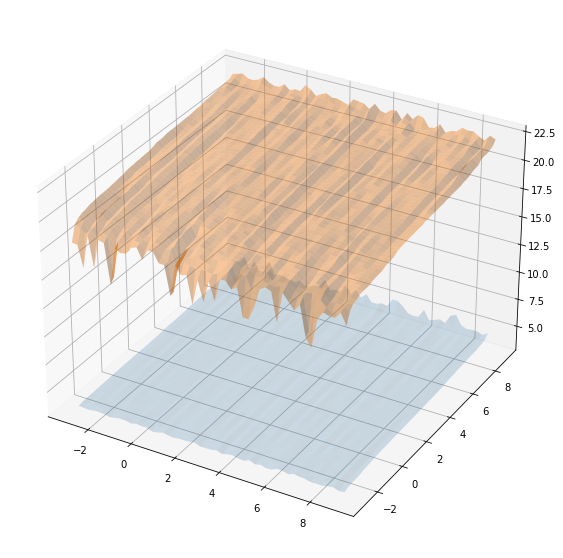

In [70]:
lda_pred, lda1_pred ,lda2_pred = ldaAlgo.use(X[:2500]) #partitioning the test values
xs, ys = np.meshgrid(np.linspace(-3,9, 50), np.linspace(-3,9, 50))
fig = plt.figure(figsize=(10,10))
axs = fig.gca(projection='3d')
axs.plot_surface(xs, ys, np.sort(-1 *lda1_pred.reshape(xs.shape),0), alpha=0.2)
axs.plot_surface(xs, ys, np.sort(-1 *lda2_pred.reshape(xs.shape),0), alpha=0.4)

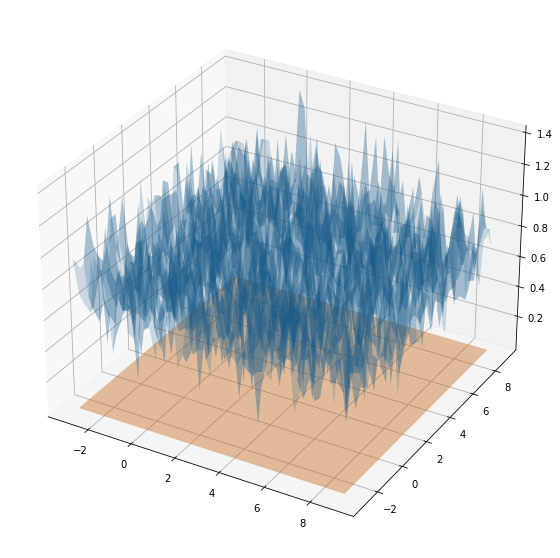

In [73]:
fig = plt.figure(figsize=(10,10))
axs = fig.gca(projection='3d')
prob1 = np.exp( lda1_pred.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(ldaAlgo.p1))
prob2 = np.exp( lda2_pred.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(ldaAlgo.p2))
axs.plot_surface(xs, ys, prob1, alpha=0.2)
axs.plot_surface(xs, ys, prob2, alpha=0.4)

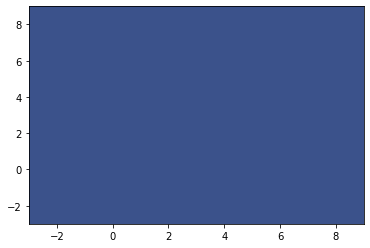

In [74]:
plt.contourf(xs, ys, (((lda1_pred-lda2_pred)) > 0).reshape(xs.shape))

In [75]:
y_actual = T.values
y_pred_lda = ldaAlgo.use(X)
f1_score(y_actual,y_pred_lda[0].round(),average='weighted')

0.657336558151086

Evaluation metrics

In [76]:
prec_lda,recall_lda,f1_score_lda,_ = precision_recall_fscore_support(y_actual,y_pred_lda[0].round(),average='weighted')
print("Precision: "+str(prec_qda)+
     "\nRecall: "+str(recall_qda)+
     "\nF1 Score: "+str(f1_score_qda))

Precision: 0.8049470377931023
Recall: 0.819
F1 Score: 0.8010850648655151


C:\Users\paree\Anaconda3\envs\py38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Below is the Discussion on the LDA algorithm implementation: -

1.	**Evaluation metrics**: We have calculated the F1 score that is 0.819, accuracy of the LDA algorithm is 0.81 and precision is 0.81

2.	**Train and test accuracies**: Comparing the train and test accuracies we get results better results and LDA performed better on the test data.

3.	**Plots for LDA algorithm**: - From above graphs we can see we have plotted three graphs to see how the training and testing data is distributed and compared the results obtained.

# IV.D Logistic Regression

Below is the implementation of the Logistic class that inherits from the Classifier class. It initialises the class in init method. Method train and use are implemented here. Here normalization is done on data to find the best fir on the gaussian curve.

In [77]:
class Logistic(Classifier): 

    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def sigmoidfunc(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.sigmoidfunc(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)

       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.zeros((D+1, K))
        niter = 10
        X = self.add_ones(X)
        T = self.add_ones(T.reshape(-1,1))
        T[:,0]=T[:,1]
        T[T[:,0]==1]=0
        (T[:,1])[T[:,1]==0]=1
        (T[:,0])[T[:,0]==-1]=1
        T[T==-1]=0
        for step in range(niter):
            ys = self.g(X,self.w)
            self.w += self.alpha * X.T @ (T - ys) 
              
    
    
    def use(self, X):
        Xs = self.normalize(X)
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

In [78]:
log = Logistic(1e-04)
log.train(X,T.values)

In [79]:
log.use(X[:5000])

array([[0.01666798, 0.98333202],
       [0.08247744, 0.91752256],
       [0.11675356, 0.88324644],
       ...,
       [0.04838426, 0.95161574],
       [0.4591096 , 0.5408904 ],
       [0.36458913, 0.63541087]])

plots for results

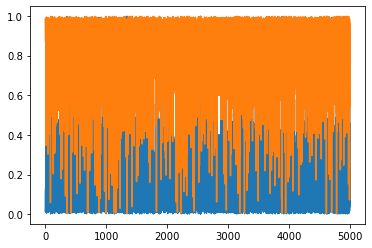

In [80]:
plt.plot(log.use(X[:5000]))

Evaluation metrics

In [81]:
y_actual = T.values
y_pred_log = log.use(X)
y_pred_log = np.argmax(y_pred_log, axis=1)
f1_score(y_actual,y_pred_log.round(),average='weighted')

0.6705331868289758

#### Below is the Discussion on the Logistic regression algorithm implementation: -

1. **Evaluation metrics**: We have calculated the F1 score that is 0.67.

2. **Train and test accuracies**: Comparing the train and test accuracies we get results better results and **Logistic** regression performed better on the test data than pocket but less than QDA and LDA.

3. **Plots for Logistic regression algorithm**: - From above graphs we can see we have plotted one graphs to see how the training and testing data is distributed and compared the results obtained.

## Discussions about classification model comparison

When we compared all the four algorithms Pocket, QDA, LDA and Logistic regression algorithm we were able to understand how different algorithms work differently to predict the output variable.

Upon executing all the algorithms, we can infer that Pocket algorithm took longer time for execution.

Upon comparing all the algorithms, we were able to understand that there was problem of overfitting for the logistic regression algorithm.

From all the algorithms QDA performed best among all the other algorithms on the classification adult data set. 

LDA and Logistic regression provides linear decision boundaries whereas QDA provides nonlinear decision boundaries.

# Conclusions

This assignment has helped a lot to get the understanding of how the algorithms work. It had many learnings like what the classification models are and how they are implemented apart from that we had good understanding on the theoretical part. The model that performed best among the model is QDA. We were able to get the better results using the QDA algorithm. 

Pocket algorithm takes longer time to run as compared to all the other algorithms. There are four algorithms that we have used on the dataset i.e. Pocket algorithm, QDA, LDA and Logistic regression. 

Dataset is selected and we have done statistical analysis on the data and got the visualised the data. Done the pre-processing on the data and applied all the four algorithms and compared the F1 score for all the algorithm.

We have checked the performance of all the algorithms by using measures like - Accuracy, Precision, recall, confusion matrix and F1 score to determine the performance of the algorithm.

After comparing the F1 score for all algorithms we conclude that QDA has around 0.7 score which was best among all the other models. Results from the QDA, LDA and logistic were better. Pocket algorithm was slow in performance and had least accuracy.

# References

Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: concepts, tools, and techniques to build intelligent systems
Géron - O'Reilly Media, Inc. - 2019

Adult income dataset
1251
https://www.kaggle.com/wenruliu/adult-income-dataset

Pocket algorithm for training perceptrons
kamacikamaci 52133 gold badges99 silver badges2727 bronze badges et al.
https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons

Note-Linear Classification.Sol
Dr. MinwooLee
https://uncc.instructure.com/courses/131789/files/9810438?module_item_id=2821068

seaborn: statistical data visualization — seaborn 0.11.0
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. For a brief introduction to the ideas behind the library, you can read the introductory notes.
https://seaborn.pydata.org

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)